# Query-MSC Demo

In [1]:
import datetime

from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
import pgpasslib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import vaex

from query_helpers import count, total_days, total_years, days_in_month, hours_in_month, query_variables
from query_temp import hdd, query_design_temp_percentile, query_all_temp
from query_rates import query_rain_rate_15

%load_ext autoreload
%autoreload 2
%page
%alias_magic t timeit

Created `%t` as an alias for `%timeit`.
Created `%%t` as an alias for `%%timeit`.


''

### Define the connection string

In [2]:
connection_string = "postgresql+psycopg2://nannau@dbmsc.pcic.uvic.ca/msc"

## Create the database connection in sqlalchemy
Using session objects

In [3]:
engine = create_engine(connection_string)
Session = sessionmaker(bind=engine)
session = Session()

In [4]:
# Specify two dates:
start_time = datetime.datetime(1991, 1, 1)
end_time = datetime.datetime(2016, 1, 31)

### Exectue first query - look at different variables available

In [ ]:
df_q = pd.read_sql(query_all_temp(start_time, end_time, session).statement, engine)
#df_vx = vaex.from_pandas(df_q)
#df_vx.head()
df_q[['air_temperature', 'completeness', 'min_1', 'max_1', 'min_2', 'max_2',	'lat',	'lon', 'net_var_name']]

In [ ]:
df_q['min_2'] = pd.to_numeric(df_q['min_2'])
df_q['max_2'] = pd.to_numeric(df_q['max_2'])

In [ ]:
#for chunk in df_q:
df_q.to_csv('~/Desktop/air_temp_query.csv')
#df_q = pd.from_csv('~/Desktop/air_temp_query.csv')

In [84]:
df_q = df_q[['air_temperature', 'completeness', 'min_1', 'max_1', 'min_2', 'max_2',	'lat',	'lon', 'net_var_name']]
df_q

KeyError: "['completeness'] not in index"

In [69]:
df_vx = vaex.from_csv('/home/nannau/Desktop/air_temp_query.csv')

In [70]:
df_vx.head()

#,Unnamed: 0,air_temperature,completeness,min_1,max_1,min_2,max_2,lat,lon,station_id,net_var_name,index
0,0,-70,0.16,-215,115,6.62688e+17,7.59974e+17,41.7833,-82.6833,6063,1,0
1,1,-170,0.16,-280,80,6.62688e+17,7.59974e+17,41.7833,-82.6833,6063,2,1
2,2,-119.1,0.16,-233,98,6.62688e+17,7.59974e+17,41.7833,-82.6833,6063,3,2
3,3,-65,0.216774,-112,137,1.10454e+18,1.39113e+18,41.8333,-82.4667,6103,1,3
4,4,-120.2,0.501935,-237,95,8.20454e+17,1.39113e+18,41.8333,-82.4667,6103,2,4
5,5,-90,0.48,-163,142,8.20541e+17,1.39113e+18,41.8333,-82.4667,6103,3,5
6,6,-76,0.473548,-179,130,9.15149e+17,1.45411e+18,41.9486,-82.5189,6143,1,6
7,7,-174.4,0.476129,-250,47,9.15149e+17,1.45411e+18,41.9486,-82.5189,6143,2,7
8,8,-123.6,0.470968,-211,77,9.15149e+17,1.45411e+18,41.9486,-82.5189,6143,3,8
9,9,-75,0.16,-220,105,6.62688e+17,7.59974e+17,41.95,-82.5167,6140,1,9


In [71]:
#df_vx[df_vx['net_var_name']== 42]
#df_vx.select((df_vx.net_var_name == 1) or (df_vx.net_var_name == 2) or (df_vx.net_var_name == 3)) 
#df_vx.evaluate(df_vx.air_temperature, selection=True)

# df_vx['class_'] = (df_vx.completeness >= 0.8)*1
df_vx['class_'] = df_vx.completeness

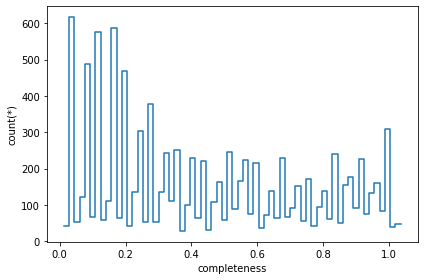

In [72]:
df_vx.plot1d(df_vx.completeness)

In [73]:
df_vx.head()

#,Unnamed: 0,air_temperature,completeness,min_1,max_1,min_2,max_2,lat,lon,station_id,net_var_name,index,class_
0,0,-70,0.16,-215,115,6.62688e+17,7.59974e+17,41.7833,-82.6833,6063,1,0,0.16
1,1,-170,0.16,-280,80,6.62688e+17,7.59974e+17,41.7833,-82.6833,6063,2,1,0.16
2,2,-119.1,0.16,-233,98,6.62688e+17,7.59974e+17,41.7833,-82.6833,6063,3,2,0.16
3,3,-65,0.216774,-112,137,1.10454e+18,1.39113e+18,41.8333,-82.4667,6103,1,3,0.216774
4,4,-120.2,0.501935,-237,95,8.20454e+17,1.39113e+18,41.8333,-82.4667,6103,2,4,0.501935
5,5,-90,0.48,-163,142,8.20541e+17,1.39113e+18,41.8333,-82.4667,6103,3,5,0.48
6,6,-76,0.473548,-179,130,9.15149e+17,1.45411e+18,41.9486,-82.5189,6143,1,6,0.473548
7,7,-174.4,0.476129,-250,47,9.15149e+17,1.45411e+18,41.9486,-82.5189,6143,2,7,0.476129
8,8,-123.6,0.470968,-211,77,9.15149e+17,1.45411e+18,41.9486,-82.5189,6143,3,8,0.470968
9,9,-75,0.16,-220,105,6.62688e+17,7.59974e+17,41.95,-82.5167,6140,1,9,0.16


In [82]:
import vaex.ml.xgboost
print(vaex.ml.xgboost)
features = ['air_temperature', 'min_1', 'max_1', 'min_2', 'max_2',	'lat',	'lon', 'station_id', 'net_var_name']


df_train, df_test = df_vx.ml.train_test_split()

xgmodel = vaex.ml.xgboost.XGBoostModel(features=features, num_boost_round=100)
xgmodel.fit(df_train, df_train.class_)
df_predict = xgmodel.transform(df_test)

<module 'vaex.ml.xgboost' from '/home/nannau/qvenv/lib/python3.6/site-packages/vaex/ml/xgboost.py'>


0.9575767921121073

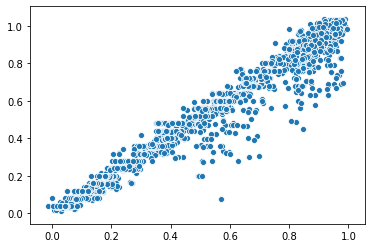

In [57]:
sns.scatterplot(xgmodel.predict(df_test), df_predict.evaluate('completeness'))
#from sklearn.metrics import confusion_matrix
#confusion_matrix(np.rint(df_predict.evaluate('xgboost_prediction')), df_predict.evaluate('class_'))
from sklearn.metrics import r2_score
r2_score(xgmodel.predict(df_test), df_predict.evaluate('completeness'))

In [115]:
import vaex.ml.cluster

In [ ]:
features = ['datum', 'lat', 'lon', 'station_id', 'completeness']

df = df_vx.to_pandas_df()

X = df[features].values

In [45]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering


#clustering = AgglomerativeClustering(n_clusters=3).fit(X)
#clustering = AffinityPropagation(damping=0.98).fit(X)
#clustering = DBSCAN(eps=100, min_samples=30).fit(X)
#clustering = OPTICS(eps=100, min_samples=30).fit(X)
clustering = KMeans().fit(X)

In [60]:
df['labels'] = clustering.labels_
df['labels'].unique()

array([5, 1, 4, 6, 3, 2, 0, 7])

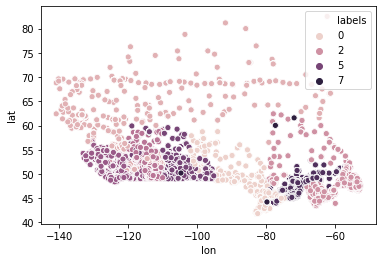

In [61]:
sns.scatterplot(df.lon, df.lat, hue=df.labels)

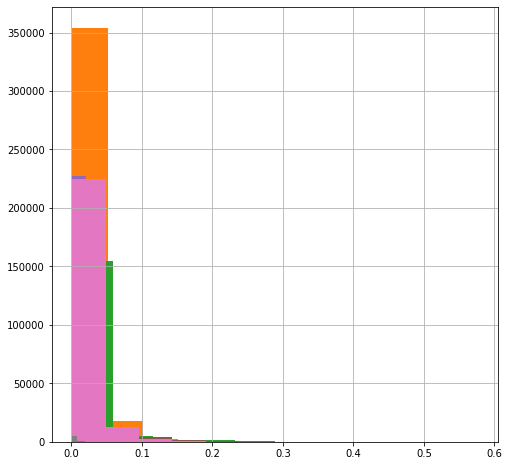

In [62]:
plt.figure(figsize=(8, 8))

for i in df['labels'].unique():
    df[df['labels']==i]['completeness'].hist()